In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [29]:
data = pd.read_csv("Ecommerce Customers.csv")

data_num = data[["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent"]]

data_cat = data[["Email","Address"]]


In [30]:
#data_num.head(5)

In [31]:
#data_num.shape

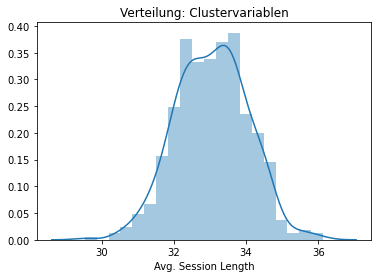

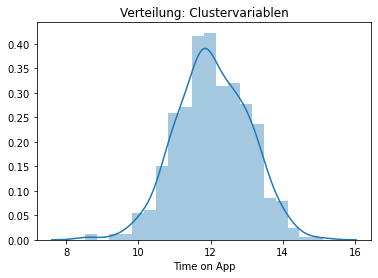

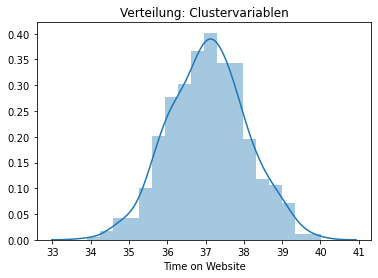

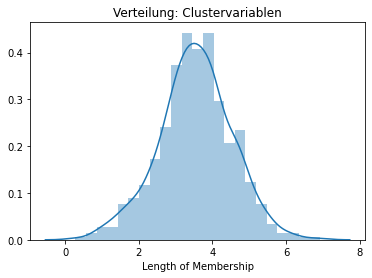

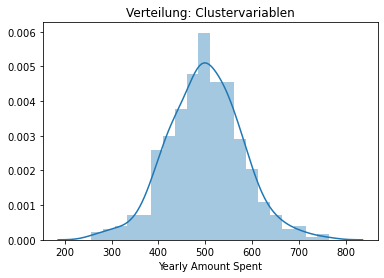

In [32]:
#Univariate visual data analysis 

def distplot(x):
    for i in x:
        sns.distplot(x[i])
        plt.title('Verteilung: Clustervariablen')
        plt.show()

distplot(data_num)

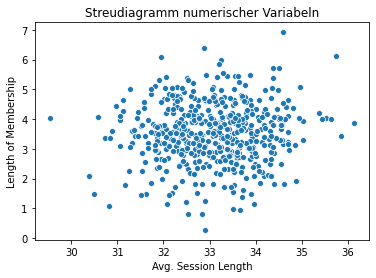

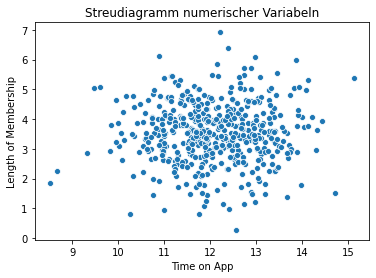

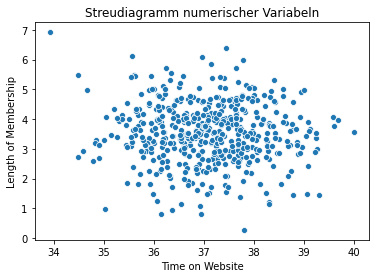

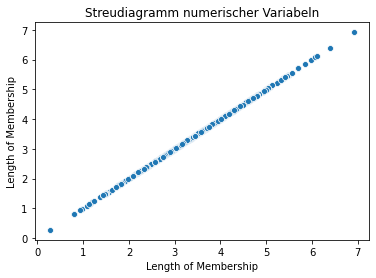

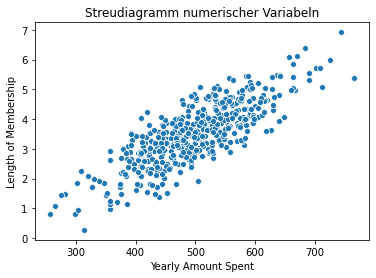

In [37]:
#bivariate data analysis

#Scatterplot numerischer V zu Avg. Session Length
def scatter (x):
    for i in x:
        sns.scatterplot(x=i, y=data_num["Length of Membership"], data=data_num)
        plt.title('Streudiagramm numerischer Variabeln')
        plt.show()

scatter(data_num)

In [8]:
#Scatterplot numerischer V zu Yearly Amount Spent


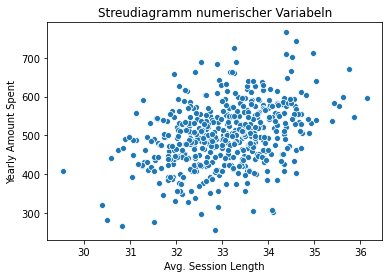

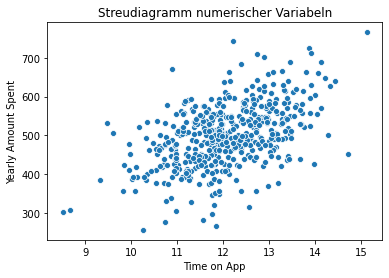

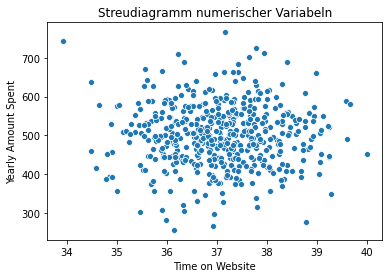

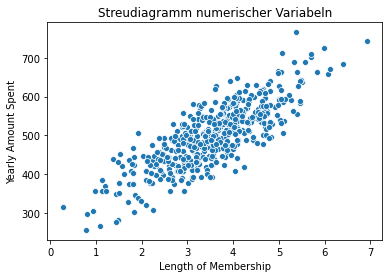

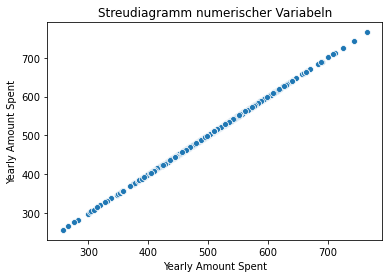

In [40]:
def scatter2 (x):
    for i in x:
        sns.scatterplot(x=i, y=data_num["Yearly Amount Spent"], data=data_num)
        plt.title('Streudiagramm numerischer Variabeln')
        plt.show()

scatter2 (data_num)